In [1]:
from outpainter_net.net import OutpainterNet
import torch
import numpy as np
import skimage
import torchvision
import json
from stacker_net.train import MyDataset
from outpainter_net.train import construct_dataset, train
import pickle
import os
from torch.utils.data import DataLoader, random_split
from torch import nn
from math import floor, ceil
from scipy.ndimage.morphology import distance_transform_edt
from torchvision.transforms.functional import center_crop, resize
from torch.nn.functional import pad
from typing import Optional, Callable, Any, List
import glob
from tqdm import tqdm
import sys
from PIL import Image
import random

sys.path.insert(0, "/mnt/c/Users/proto/repos/image-outpainting")
import outpainting

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

/home/proto/miniconda3/envs/vision-stretcher/lib/python3.9/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
selection_filename = 'data/selected_images.json'
with open(selection_filename, 'r') as f:
        paths = json.load(f)
transforms = torchvision.transforms.Compose([
    torchvision.transforms.PILToTensor(),
    torchvision.transforms.ConvertImageDtype(torch.float32)
])
img_ds = MyDataset('data/data_256', paths, transform=transforms)

In [3]:
fname = "data/chunk8_dataset.pkl"
force_overwrite = False

if force_overwrite or not os.path.isfile(fname):
    ds = construct_dataset(img_ds, chunk_size=8, sample_size=50000)
    with open(fname, "wb") as f:
        pickle.dump(ds, f)
else:
    with open(fname, "rb") as f:
        ds = pickle.load(f)

KeyboardInterrupt: 

In [4]:
BATCH_SIZE = 128

train_len = int(len(ds) * 0.8)
val_len = len(ds) - train_len
train_ds, val_ds = random_split(ds, (train_len, val_len))
train_dl = DataLoader(train_ds, BATCH_SIZE, shuffle=True, pin_memory=True)
val_dl = DataLoader(val_ds, BATCH_SIZE, pin_memory=True)

In [5]:
model = OutpainterNet(chunk_size=8).to(device)

In [6]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, train_dl, val_dl, device=device, print_metrics=True, epochs=50)
torch.save(model.state_dict(), "outpainter_net/state8.pt")

  2%|▏         | 1/50 [00:27<22:30, 27.57s/it]

Epoch 0: train loss = 0.020, val loss = 0.019


  4%|▍         | 2/50 [00:53<21:10, 26.47s/it]

Epoch 1: train loss = 0.018, val loss = 0.018


  6%|▌         | 3/50 [01:18<20:28, 26.13s/it]

Epoch 2: train loss = 0.018, val loss = 0.018


  8%|▊         | 4/50 [01:44<19:57, 26.03s/it]

Epoch 3: train loss = 0.017, val loss = 0.017


 10%|█         | 5/50 [02:10<19:27, 25.95s/it]

Epoch 4: train loss = 0.017, val loss = 0.017


 12%|█▏        | 6/50 [02:36<19:01, 25.95s/it]

Epoch 5: train loss = 0.017, val loss = 0.017


 14%|█▍        | 7/50 [03:03<18:55, 26.40s/it]

Epoch 6: train loss = 0.017, val loss = 0.017


 16%|█▌        | 8/50 [03:30<18:36, 26.59s/it]

Epoch 7: train loss = 0.017, val loss = 0.017


 18%|█▊        | 9/50 [03:57<18:07, 26.52s/it]

Epoch 8: train loss = 0.017, val loss = 0.017


 20%|██        | 10/50 [04:23<17:40, 26.51s/it]

Epoch 9: train loss = 0.017, val loss = 0.017


 22%|██▏       | 11/50 [04:50<17:10, 26.43s/it]

Epoch 10: train loss = 0.017, val loss = 0.017


 24%|██▍       | 12/50 [05:16<16:43, 26.41s/it]

Epoch 11: train loss = 0.017, val loss = 0.017


 26%|██▌       | 13/50 [05:42<16:17, 26.42s/it]

Epoch 12: train loss = 0.017, val loss = 0.017


 28%|██▊       | 14/50 [06:09<15:48, 26.35s/it]

Epoch 13: train loss = 0.017, val loss = 0.017


 30%|███       | 15/50 [06:35<15:22, 26.36s/it]

Epoch 14: train loss = 0.017, val loss = 0.017


 32%|███▏      | 16/50 [07:01<14:56, 26.36s/it]

Epoch 15: train loss = 0.017, val loss = 0.017


 34%|███▍      | 17/50 [07:28<14:30, 26.38s/it]

Epoch 16: train loss = 0.017, val loss = 0.017


 36%|███▌      | 18/50 [07:54<14:06, 26.44s/it]

Epoch 17: train loss = 0.017, val loss = 0.017


 38%|███▊      | 19/50 [08:21<13:44, 26.61s/it]

Epoch 18: train loss = 0.017, val loss = 0.016


 40%|████      | 20/50 [08:48<13:19, 26.64s/it]

Epoch 19: train loss = 0.017, val loss = 0.017


 42%|████▏     | 21/50 [09:15<12:52, 26.64s/it]

Epoch 20: train loss = 0.016, val loss = 0.016


 44%|████▍     | 22/50 [09:41<12:26, 26.65s/it]

Epoch 21: train loss = 0.016, val loss = 0.016


 46%|████▌     | 23/50 [10:08<11:58, 26.63s/it]

Epoch 22: train loss = 0.016, val loss = 0.017


 48%|████▊     | 24/50 [10:34<11:30, 26.57s/it]

Epoch 23: train loss = 0.016, val loss = 0.016


 50%|█████     | 25/50 [11:01<11:03, 26.55s/it]

Epoch 24: train loss = 0.016, val loss = 0.017


 52%|█████▏    | 26/50 [11:27<10:36, 26.52s/it]

Epoch 25: train loss = 0.016, val loss = 0.016


 54%|█████▍    | 27/50 [11:54<10:10, 26.55s/it]

Epoch 26: train loss = 0.016, val loss = 0.016


 56%|█████▌    | 28/50 [12:20<09:44, 26.55s/it]

Epoch 27: train loss = 0.016, val loss = 0.016


 58%|█████▊    | 29/50 [12:47<09:17, 26.53s/it]

Epoch 28: train loss = 0.016, val loss = 0.016


 60%|██████    | 30/50 [13:14<08:52, 26.61s/it]

Epoch 29: train loss = 0.016, val loss = 0.016


 62%|██████▏   | 31/50 [13:41<08:26, 26.66s/it]

Epoch 30: train loss = 0.016, val loss = 0.016


 64%|██████▍   | 32/50 [14:07<07:59, 26.65s/it]

Epoch 31: train loss = 0.016, val loss = 0.016


 66%|██████▌   | 33/50 [14:34<07:32, 26.61s/it]

Epoch 32: train loss = 0.016, val loss = 0.017


 68%|██████▊   | 34/50 [15:00<07:04, 26.53s/it]

Epoch 33: train loss = 0.016, val loss = 0.016


 70%|███████   | 35/50 [15:27<06:38, 26.59s/it]

Epoch 34: train loss = 0.016, val loss = 0.016


 72%|███████▏  | 36/50 [15:53<06:12, 26.59s/it]

Epoch 35: train loss = 0.016, val loss = 0.016


 74%|███████▍  | 37/50 [16:20<05:45, 26.54s/it]

Epoch 36: train loss = 0.016, val loss = 0.016


 76%|███████▌  | 38/50 [16:46<05:18, 26.51s/it]

Epoch 37: train loss = 0.016, val loss = 0.016


 78%|███████▊  | 39/50 [17:13<04:51, 26.51s/it]

Epoch 38: train loss = 0.016, val loss = 0.016


 80%|████████  | 40/50 [17:39<04:25, 26.52s/it]

Epoch 39: train loss = 0.016, val loss = 0.016


 82%|████████▏ | 41/50 [18:06<03:59, 26.60s/it]

Epoch 40: train loss = 0.016, val loss = 0.016


 84%|████████▍ | 42/50 [18:33<03:32, 26.57s/it]

Epoch 41: train loss = 0.016, val loss = 0.016


 86%|████████▌ | 43/50 [18:59<03:06, 26.58s/it]

Epoch 42: train loss = 0.016, val loss = 0.016


 88%|████████▊ | 44/50 [19:26<02:39, 26.56s/it]

Epoch 43: train loss = 0.016, val loss = 0.016


 90%|█████████ | 45/50 [19:52<02:12, 26.53s/it]

Epoch 44: train loss = 0.016, val loss = 0.016


 92%|█████████▏| 46/50 [20:19<01:46, 26.57s/it]

Epoch 45: train loss = 0.016, val loss = 0.016


 94%|█████████▍| 47/50 [20:45<01:19, 26.55s/it]

Epoch 46: train loss = 0.016, val loss = 0.016


 96%|█████████▌| 48/50 [21:12<00:53, 26.56s/it]

Epoch 47: train loss = 0.016, val loss = 0.016


 98%|█████████▊| 49/50 [21:38<00:26, 26.50s/it]

Epoch 48: train loss = 0.016, val loss = 0.016


100%|██████████| 50/50 [22:05<00:00, 26.51s/it]

Epoch 49: train loss = 0.016, val loss = 0.016


In [4]:
ds = None
train_ds = None
val_ds = None
train_dl = None
val_dl = None

In [5]:
fname = "data/chunk12_dataset.pkl"
force_overwrite = False

if force_overwrite or not os.path.isfile(fname):
    ds = construct_dataset(img_ds, chunk_size=12, sample_size=25000)
    with open(fname, "wb") as f:
        pickle.dump(ds, f)
else:
    with open(fname, "rb") as f:
        ds = pickle.load(f)

100%|██████████| 25000/25000 [01:54<00:00, 219.04it/s]


In [6]:
BATCH_SIZE = 128

train_len = int(len(ds) * 0.8)
val_len = len(ds) - train_len
train_ds, val_ds = random_split(ds, (train_len, val_len))
train_dl = DataLoader(train_ds, BATCH_SIZE, shuffle=True, pin_memory=True)
val_dl = DataLoader(val_ds, BATCH_SIZE, pin_memory=True)

In [7]:
model = OutpainterNet(chunk_size=12).to(device)

In [8]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())
train(model, loss_fn, optimizer, train_dl, val_dl, device=device, print_metrics=True, epochs=50)
torch.save(model.state_dict(), "outpainter_net/state12.pt")

  2%|▏         | 1/50 [00:10<08:36, 10.53s/it]

Epoch 0: train loss = 0.028, val loss = 0.025


  4%|▍         | 2/50 [00:19<07:46,  9.73s/it]

Epoch 1: train loss = 0.024, val loss = 0.024


  6%|▌         | 3/50 [00:28<07:27,  9.53s/it]

Epoch 2: train loss = 0.024, val loss = 0.023


  8%|▊         | 4/50 [00:38<07:14,  9.44s/it]

Epoch 3: train loss = 0.023, val loss = 0.023


 10%|█         | 5/50 [00:47<07:00,  9.35s/it]

Epoch 4: train loss = 0.023, val loss = 0.023


 12%|█▏        | 6/50 [00:56<06:49,  9.30s/it]

Epoch 5: train loss = 0.022, val loss = 0.022


 14%|█▍        | 7/50 [01:05<06:36,  9.23s/it]

Epoch 6: train loss = 0.022, val loss = 0.022


 16%|█▌        | 8/50 [01:15<06:27,  9.23s/it]

Epoch 7: train loss = 0.022, val loss = 0.022


 18%|█▊        | 9/50 [01:24<06:17,  9.22s/it]

Epoch 8: train loss = 0.022, val loss = 0.022


 20%|██        | 10/50 [01:33<06:07,  9.19s/it]

Epoch 9: train loss = 0.022, val loss = 0.023


 22%|██▏       | 11/50 [01:42<05:59,  9.23s/it]

Epoch 10: train loss = 0.022, val loss = 0.022


 24%|██▍       | 12/50 [01:51<05:51,  9.24s/it]

Epoch 11: train loss = 0.022, val loss = 0.022


 26%|██▌       | 13/50 [02:01<05:42,  9.26s/it]

Epoch 12: train loss = 0.022, val loss = 0.022


 28%|██▊       | 14/50 [02:10<05:33,  9.26s/it]

Epoch 13: train loss = 0.022, val loss = 0.023


 30%|███       | 15/50 [02:19<05:26,  9.34s/it]

Epoch 14: train loss = 0.022, val loss = 0.022


 32%|███▏      | 16/50 [02:29<05:18,  9.36s/it]

Epoch 15: train loss = 0.022, val loss = 0.022


 34%|███▍      | 17/50 [02:38<05:08,  9.35s/it]

Epoch 16: train loss = 0.022, val loss = 0.022


 36%|███▌      | 18/50 [02:48<05:00,  9.39s/it]

Epoch 17: train loss = 0.022, val loss = 0.022


 38%|███▊      | 19/50 [02:57<04:53,  9.48s/it]

Epoch 18: train loss = 0.022, val loss = 0.022


 40%|████      | 20/50 [03:07<04:47,  9.57s/it]

Epoch 19: train loss = 0.022, val loss = 0.022


 42%|████▏     | 21/50 [03:17<04:37,  9.58s/it]

Epoch 20: train loss = 0.022, val loss = 0.022


 44%|████▍     | 22/50 [03:27<04:29,  9.63s/it]

Epoch 21: train loss = 0.022, val loss = 0.022


 46%|████▌     | 23/50 [03:37<04:22,  9.74s/it]

Epoch 22: train loss = 0.022, val loss = 0.022


 48%|████▊     | 24/50 [03:46<04:13,  9.75s/it]

Epoch 23: train loss = 0.022, val loss = 0.022


 50%|█████     | 25/50 [03:56<04:06,  9.88s/it]

Epoch 24: train loss = 0.022, val loss = 0.022


 52%|█████▏    | 26/50 [04:06<03:53,  9.73s/it]

Epoch 25: train loss = 0.022, val loss = 0.022


 54%|█████▍    | 27/50 [04:16<03:44,  9.78s/it]

Epoch 26: train loss = 0.022, val loss = 0.022


 56%|█████▌    | 28/50 [04:25<03:31,  9.63s/it]

Epoch 27: train loss = 0.022, val loss = 0.022


 58%|█████▊    | 29/50 [04:34<03:19,  9.50s/it]

Epoch 28: train loss = 0.022, val loss = 0.022


 60%|██████    | 30/50 [04:44<03:08,  9.44s/it]

Epoch 29: train loss = 0.022, val loss = 0.022


 62%|██████▏   | 31/50 [04:53<03:00,  9.49s/it]

Epoch 30: train loss = 0.022, val loss = 0.022


 64%|██████▍   | 32/50 [05:03<02:51,  9.54s/it]

Epoch 31: train loss = 0.022, val loss = 0.022


 66%|██████▌   | 33/50 [05:12<02:40,  9.45s/it]

Epoch 32: train loss = 0.022, val loss = 0.022


 68%|██████▊   | 34/50 [05:21<02:30,  9.41s/it]

Epoch 33: train loss = 0.022, val loss = 0.022


 70%|███████   | 35/50 [05:31<02:20,  9.38s/it]

Epoch 34: train loss = 0.022, val loss = 0.022


 72%|███████▏  | 36/50 [05:40<02:12,  9.44s/it]

Epoch 35: train loss = 0.022, val loss = 0.022


 74%|███████▍  | 37/50 [05:50<02:02,  9.45s/it]

Epoch 36: train loss = 0.022, val loss = 0.022


 76%|███████▌  | 38/50 [05:59<01:54,  9.54s/it]

Epoch 37: train loss = 0.022, val loss = 0.022


 78%|███████▊  | 39/50 [06:09<01:45,  9.59s/it]

Epoch 38: train loss = 0.022, val loss = 0.022


 80%|████████  | 40/50 [06:19<01:37,  9.74s/it]

Epoch 39: train loss = 0.022, val loss = 0.022


 82%|████████▏ | 41/50 [06:29<01:26,  9.67s/it]

Epoch 40: train loss = 0.022, val loss = 0.022


 84%|████████▍ | 42/50 [06:39<01:18,  9.80s/it]

Epoch 41: train loss = 0.022, val loss = 0.022


 86%|████████▌ | 43/50 [06:48<01:08,  9.73s/it]

Epoch 42: train loss = 0.022, val loss = 0.022


 88%|████████▊ | 44/50 [06:58<00:57,  9.60s/it]

Epoch 43: train loss = 0.022, val loss = 0.022


 90%|█████████ | 45/50 [07:07<00:47,  9.54s/it]

Epoch 44: train loss = 0.022, val loss = 0.022


 92%|█████████▏| 46/50 [07:17<00:38,  9.53s/it]

Epoch 45: train loss = 0.022, val loss = 0.022


 94%|█████████▍| 47/50 [07:26<00:28,  9.48s/it]

Epoch 46: train loss = 0.022, val loss = 0.022


 96%|█████████▌| 48/50 [07:36<00:19,  9.51s/it]

Epoch 47: train loss = 0.022, val loss = 0.022


 98%|█████████▊| 49/50 [07:45<00:09,  9.50s/it]

Epoch 48: train loss = 0.022, val loss = 0.022


100%|██████████| 50/50 [07:54<00:00,  9.50s/it]

Epoch 49: train loss = 0.022, val loss = 0.021


In [3]:
# def blend_batch(output_batch, input_batch, blend_width=8):
#     '''
#     Blends an input of arbitrary resolution with its output, using the highest resolution of both.
#     Returns: final result + source mask.
#     '''
#     print('Input size:', input_img.shape)
#     print('Output size:', output_img.shape)
#     in_factor = input_size / output_size
#     if input_img.shape[1] < in_factor * output_img.shape[1]:
#         # Output dominates, adapt input
#         out_width, out_height = output_img.shape[1], output_img.shape[0]
#         in_width, in_height = int(out_width * in_factor), int(out_height * in_factor)
#         input_img = skimage.transform.resize(input_img, (in_height, in_width), anti_aliasing=True)
#     else:
#         # Input dominates, adapt output
#         in_width, in_height = input_img.shape[1], input_img.shape[0]
#         out_width, out_height = int(in_width / in_factor), int(in_height / in_factor)
#         output_img = skimage.transform.resize(output_img, (out_height, out_width), anti_aliasing=True)
    
#     # Construct source mask
#     src_mask = np.zeros((output_size, output_size))
#     src_mask[expand_size+1:-expand_size-1, expand_size+1:-expand_size-1] = 1 # 1 extra pixel for safety
#     src_mask = distance_transform_edt(src_mask) / blend_width
#     src_mask = np.minimum(src_mask, 1)
#     src_mask = skimage.transform.resize(src_mask, (out_height, out_width), anti_aliasing=True)
#     src_mask = np.tile(src_mask[:, :, np.newaxis], (1, 1, 3))
    
#     # Pad input
#     input_pad = np.zeros((out_height, out_width, 3))
#     x1 = (out_width - in_width) // 2
#     y1 = (out_height - in_height) // 2
#     input_pad[y1:y1+in_height, x1:x1+in_width, :] = input_img
    
#     # Merge
#     blended = input_pad * src_mask + output_img * (1 - src_mask)

#     print('Blended size:', blended.shape)

#     return blended, src_mask

def create_forward_func(model: outpainting.CEGenerator, input_shape, output_shape = [256, 256], blend_width=8):
    outpaint_dims = (
        floor((output_shape[1] - input_shape[1]) / 2),
        ceil((output_shape[1] - input_shape[1]) / 2),
        floor((output_shape[0] - input_shape[0]) / 2),
        ceil((output_shape[0] - input_shape[0]) / 2)
    )

    src_mask = np.zeros(output_shape)
    src_mask[outpaint_dims[2]+1:-outpaint_dims[3]-1, outpaint_dims[0]+1:-outpaint_dims[1]-1] = 1 # 1 extra pixel for safety
    src_mask = distance_transform_edt(src_mask) / blend_width
    src_mask = np.minimum(src_mask, 1)
    src_mask = skimage.transform.resize(src_mask, output_shape, anti_aliasing=True)
    src_mask = torch.tensor(src_mask, device=device)

    def outpaint(X_batch: torch.Tensor):
        masked_batch = torch.ones([X_batch.shape[0], 3, output_shape[0], output_shape[1]], dtype=torch.float, device=device)
        masked_batch[..., outpaint_dims[2]:-outpaint_dims[3], outpaint_dims[0]:-outpaint_dims[1]] = X_batch
        pred_batch = resize(model(resize(masked_batch, [192, 192])), output_shape)
        padded_batch = pad(X_batch, outpaint_dims)
        preds = padded_batch * src_mask + pred_batch * (1 - src_mask)
        return torch.clip(preds, 0., 1.)
    
    return outpaint

def create_forward_opn(model: OutpainterNet, output_shape = [256, 256]):
    return lambda img: model.image_outpaint(img, output_shape)


In [4]:
@torch.no_grad()
def model_test(forward_func: Callable, dl: DataLoader, input_size: List[int]):
    loss_fn = nn.MSELoss()
    total_loss = 0
    count = 0
    for batch in tqdm(dl):
        batch = batch.to(device)
        X = center_crop(batch, input_size)
        preds = forward_func(X)
        loss = loss_fn(preds, batch)
        total_loss += loss.detach()
        count += 1
    return total_loss.item() / count

def pil_loader(path: str) -> Image.Image:
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, "rb") as f:
        img = Image.open(f)
        return img.convert("RGB")

class BasicDataset(torchvision.datasets.VisionDataset):
    def __init__(self, root: str, transforms: Optional[Callable] = None, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None) -> None:
        super().__init__(root, transforms, transform, target_transform)
        self.files = sorted(glob.glob("%s/**/*.jpg" % root, recursive=True))
    
    def __getitem__(self, index: int) -> Any:
        return self.transform(pil_loader(self.files[index]))
    
    def __len__(self) -> int:
        return len(self.files)

In [5]:
BATCH_SIZE = 256

test_ds = BasicDataset("data/test_256/", transform=transforms)
test_dl = DataLoader(test_ds, BATCH_SIZE, pin_memory=True)

In [9]:
model = OutpainterNet(chunk_size=4).to(device)
model.load_state_dict(torch.load("outpainter_net/state.pt"))
model.eval()
forward = create_forward_opn(model)

In [10]:
model_test(forward, test_dl, [171, 171])

100%|██████████| 1284/1284 [18:45<00:00,  1.14it/s]


0.05175549516053957

In [21]:
model = OutpainterNet(chunk_size=4).to(device)
model.load_state_dict(torch.load("outpainter_net/state.pt"))
model.eval()
forward = create_forward_opn(model)

In [22]:
model_test(forward, test_dl, [192, 192])

100%|██████████| 1284/1284 [17:26<00:00,  1.23it/s]


0.04353831935894452

In [23]:
model = OutpainterNet(chunk_size=4).to(device)
model.load_state_dict(torch.load("outpainter_net/state.pt"))
model.eval()
forward = create_forward_opn(model)

In [24]:
model_test(forward, test_dl, [224, 224])

100%|██████████| 1284/1284 [15:09<00:00,  1.41it/s]


0.027908393527117104

In [25]:
model = OutpainterNet(chunk_size=8).to(device)
model.load_state_dict(torch.load("outpainter_net/state8.pt"))
model.eval()
forward = create_forward_opn(model)

In [26]:
model_test(forward, test_dl, [171, 171])

100%|██████████| 1284/1284 [15:52<00:00,  1.35it/s]


0.055564084157022735

In [11]:
model = OutpainterNet(chunk_size=8).to(device)
model.load_state_dict(torch.load("outpainter_net/state8.pt"))
model.eval()
forward = create_forward_opn(model)

In [12]:
model_test(forward, test_dl, [192, 192])

100%|██████████| 1284/1284 [15:09<00:00,  1.41it/s]


0.04676029466765692

In [7]:
model = OutpainterNet(chunk_size=8).to(device)
model.load_state_dict(torch.load("outpainter_net/state8.pt"))
model.eval()
forward = create_forward_opn(model)

In [8]:
model_test(forward, test_dl, [224, 224])

100%|██████████| 1284/1284 [18:55<00:00,  1.13it/s]


0.029716571914815457

In [9]:
model = OutpainterNet(chunk_size=12).to(device)
model.load_state_dict(torch.load("outpainter_net/state12.pt"))
model.eval()
forward = create_forward_opn(model)

In [10]:
model_test(forward, test_dl, [171, 171])

100%|██████████| 1284/1284 [15:24<00:00,  1.39it/s]


0.055335689556561526

In [11]:
model = OutpainterNet(chunk_size=12).to(device)
model.load_state_dict(torch.load("outpainter_net/state12.pt"))
model.eval()
forward = create_forward_opn(model)

In [12]:
model_test(forward, test_dl, [192, 192])

100%|██████████| 1284/1284 [15:20<00:00,  1.39it/s]


0.04602155952810127

In [13]:
model = OutpainterNet(chunk_size=12).to(device)
model.load_state_dict(torch.load("outpainter_net/state12.pt"))
model.eval()
forward = create_forward_opn(model)

In [14]:
model_test(forward, test_dl, [224, 224])

100%|██████████| 1284/1284 [14:49<00:00,  1.44it/s]


0.030090911366115105

In [12]:
model = outpainting.load_model('generator_final.pt').to(device)
model.eval()
forward = create_forward_func(model, [171, 171])

In [13]:
model_test(forward, test_dl, [171, 171])

100%|██████████| 1284/1284 [37:22<00:00,  1.75s/it] 


0.06537046266204802

In [8]:
model = outpainting.load_model('generator_final.pt').to(device)
model.eval()
forward = create_forward_func(model, [192, 192])

In [9]:
model_test(forward, test_dl, [192, 192])

100%|██████████| 1284/1284 [15:16<00:00,  1.40it/s]


0.05370450776710071

In [10]:
model = outpainting.load_model('generator_final.pt').to(device)
model.eval()
forward = create_forward_func(model, [224, 224])

In [11]:
model_test(forward, test_dl, [224, 224])

100%|██████████| 1284/1284 [14:50<00:00,  1.44it/s]


0.020206043497733167

---

In [8]:
opn4 = OutpainterNet(chunk_size=4).to(device)
opn4.load_state_dict(torch.load("outpainter_net/state.pt"))
opn4.eval()
forward4 = create_forward_opn(opn4, output_shape=[384, 384])

In [9]:
opn8 = OutpainterNet(chunk_size=8).to(device)
opn8.load_state_dict(torch.load("outpainter_net/state8.pt"))
opn8.eval()
forward8 = create_forward_opn(opn8, output_shape=[384, 384])

In [10]:
opn12 = OutpainterNet(chunk_size=12).to(device)
opn12.load_state_dict(torch.load("outpainter_net/state12.pt"))
opn12.eval()
forward12 = create_forward_opn(opn12, output_shape=[384, 384])

In [26]:
alt = outpainting.load_model('generator_final.pt').to(device)
alt.eval()
forwardalt = create_forward_func(alt, [256, 256], [384, 384])

In [33]:
samples = random.sample(range(len(test_ds)), 10)
samples = torch.stack([test_ds[i] for i in samples]).to(device)
samples4 = torch.cat([forward4(sample.unsqueeze(0)) for sample in samples], dim=0)
samples8 = torch.cat([forward8(sample.unsqueeze(0)) for sample in samples], dim=0)
samples12 = torch.cat([forward12(sample.unsqueeze(0)) for sample in samples], dim=0)
samplesalt = forwardalt(samples)

In [34]:
for i, sample in enumerate(samples4):
    torchvision.transforms.functional.to_pil_image(sample).save("data/experiments/3/mine4_" + str(i) + ".png")
for i, sample in enumerate(samples8):
    torchvision.transforms.functional.to_pil_image(sample).save("data/experiments/3/mine8_" + str(i) + ".png")
for i, sample in enumerate(samples12):
    torchvision.transforms.functional.to_pil_image(sample).save("data/experiments/3/mine12_" + str(i) + ".png")
for i, sample in enumerate(samplesalt):
    torchvision.transforms.functional.to_pil_image(sample).save("data/experiments/3/ref_" + str(i) + ".png")

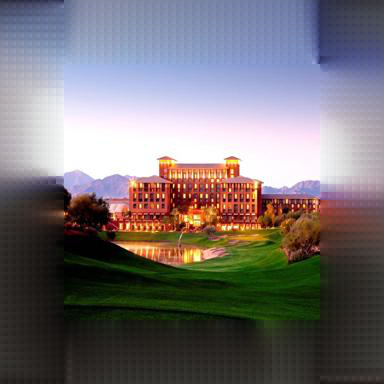

In [35]:
torchvision.transforms.functional.to_pil_image(samples8[3])